In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img_array = cv2.imread("/Users/dravyanshu/Desktop/data_Set/close_Eyes/s0005_00368_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)


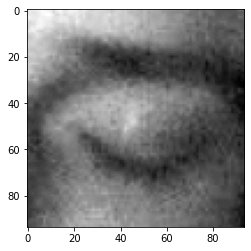

In [6]:
plt.imshow(img_array,cmap="gray")

In [7]:
img_array.shape

(94, 94)

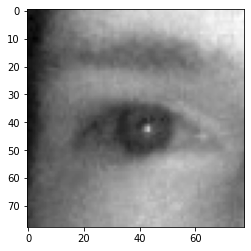

In [8]:
Datadirectory= "/Users/dravyanshu/Desktop/data_Set/"
Classes = ["open_Eyes","close_Eyes"]
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

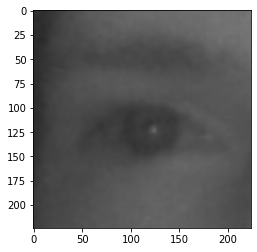

In [9]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

READING ALL THE IMAGES AND CONVERTING THEM INTO AN ARRAY FOR DATA AND LABLES

In [10]:
training_Data=[]
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                 backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                 new_array=cv2.resize(backtorgb,(img_size,img_size))
                 training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

7453


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X=[]
Y=[]
for features,lable in training_Data:
    X.append(features)
    Y.append(lable)

X=np.array(X).reshape(-1,img_size,img_size,3)


In [15]:
X.shape

(7453, 224, 224, 3)

In [16]:
X=X/255.0;

In [17]:
Z=np.array(Y)

In [18]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out=open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle","rb")
Y=pickle.load(pickle_in)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications. mobilenet.MobileNet()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-16 12:13:45.296533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-16 12:13:45.309851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

TRANSFER LEARNING

In [23]:
base_input=model.layers[0].input

In [24]:
base_output=model.layers[-4].output

In [25]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1) (Flat_layer) ## one node (1/ 0)
final_ouput=layers.Activation ('sigmoid') (final_output)

In [26]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [28]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
new_model.fit(X, Z, epochs = 1,validation_split = 0.1) ## training

In [ ]:
new_model=tf.keras.models.load_model('my_modelfinal.h5')

CHECKING THE NETWORK FOR PREDICTION

In [ ]:
img_array = cv2.imread("/Users/dravyanshu/Desktop/data_Set/close_Eyes/s0002_00894_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

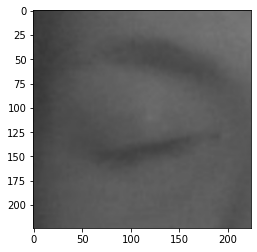

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 276ms/step


2022-07-16 09:55:24.946459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
prediction

array([[1.7127457]], dtype=float32)

LETS CHECK ON UNKNOWN IMAGE

In [ ]:
img=cv2.imread("/Users/dravyanshu/Downloads/man.jpg")

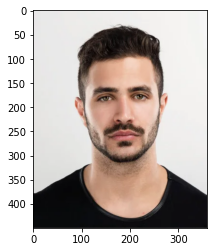

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

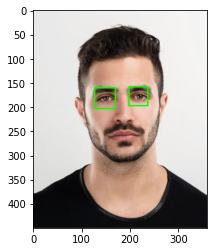

In [ ]:
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

CROPPING THE EYE IMAGE


In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print (faceCascade.empty())
eyes = eye_cascade.detectMultiScale (gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh, ex:ex + ew]

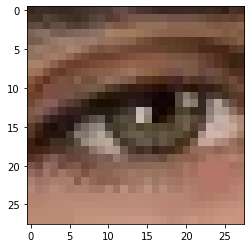

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(28, 28, 3)

In [ ]:
final_image =cv2.resize(eyes_roi, (224, 224))
final_image= np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0

In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict (final_image)

1/1 [==============================] - 0s 21ms/step


array([[0.26759934]], dtype=float32)

REALTIME VIDEO DEMO
FIRST DETECT THAT EYES ARE CLOSED ON OPEN

In [ ]:
import cv2 ### pip install opencv-python
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture (1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

    final_image =cv2.resize(eyes_roi, (224,224))
    final_image= np.expand_dims (final_image, axis =0) ## need fourth dimension
    final_image=final_image/255.0  

    
    Predictions = new_model.predict(final_image)
    if (Predictions>0 and Predictions<1):
        status = "Open Eyes"
    else:    
        status = "Closed Eyes"

    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)     

    #draw rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX 

    # Use putText() method for
    # inserting text on video
    cv2.putText(frame,status,(50, 50),font, 3,(0, 0, 255),2,cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break      

cap.release()
cv2.destroyAllWindows()




OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


NameError: name 'eyes_roi' is not defined

IF EYES ARE CLOSED FOR UNUSUAL TIME ,LIKE MORE THAN BLINKS,FOR FEW SECONDS,ALARM GENERATED


In [ ]:
import beepy
frequency = 2500 # Set Frequency To 2500 Hertz
duration=1000 # Set Duration To 1000 ms == 1 second
import numpy as np
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ## pip install deepface
path = "haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter=0
while True:
    ret, frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)             
    #draw rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX         

    final_image =cv2.resize(eyes_roi, (224,224))
    final_image= np.expand_dims (final_image, axis =0) ## need fourth dimension
    final_image=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0 and Predictions<1):
        status="Open Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    else:
        counter=counter+1
        status="Closed eyes"
        cv2.putText(frame,status,(150, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        if counter>5:
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame,'Sleep Alert!!',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            beepy.beep(3)
            counter=0
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break      

cap.release()
cv2.destroyAllWindows()        
            
                  


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


False


NameError: name 'eyes_roi' is not defined